# Modeling and Simulation in Python

Chapter 4

Copyright 2017 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim library
from modsim import *

## Returning values

Here's a simple function that returns a value:

In [2]:
def add_five(x):
    return x + 5

And here's how we call it.

In [3]:
y = add_five(3)

8

If you run a function on the last line of a cell, Jupyter displays the result:

In [4]:
add_five(5)

10

But that can be a bad habit, because usually if you call a function and don't assign the result in a variable, the result gets discarded.

In the following example, Jupyter shows the second result, but the first result just disappears.

In [5]:
add_five(3)
add_five(5)

10

When you call a function that returns a variable, it is generally a good idea to assign the result to a variable.

In [6]:
y1 = add_five(3)
y2 = add_five(5)

print(y1, y2)

8 10


**Exercise:** Write a function called `make_state` that creates a `State` object with the state variables `olin=10` and `wellesley=2`, and then returns the new `State` object.

Write a line of code that calls `make_state` and assigns the result to a variable named `init`.

In [13]:
class State:
    def __init__(self, olin, wellesley):
        self.olin = olin
        self.wellesley = wellesley

def make_state():
    return State(10, 2)

state = make_state()
print(state.olin)       # Output: 10
print(state.wellesley) 

10
2


In [14]:
init = make_state()
print(init.olin)       # Output: 10
print(init.wellesley)  # Output: 2


10
2


## Running simulations

Here's the code from the previous notebook.

In [15]:
def step(state, p1, p2):
    """Simulate one minute of time.
    
    state: bikeshare State object
    p1: probability of an Olin->Wellesley customer arrival
    p2: probability of a Wellesley->Olin customer arrival
    """
    if flip(p1):
        bike_to_wellesley(state)
    
    if flip(p2):
        bike_to_olin(state)
        
def bike_to_wellesley(state):
    """Move one bike from Olin to Wellesley.
    
    state: bikeshare State object
    """
    if state.olin == 0:
        state.olin_empty += 1
        return
    state.olin -= 1
    state.wellesley += 1
    
def bike_to_olin(state):
    """Move one bike from Wellesley to Olin.
    
    state: bikeshare State object
    """
    if state.wellesley == 0:
        state.wellesley_empty += 1
        return
    state.wellesley -= 1
    state.olin += 1
    
def decorate_bikeshare():
    """Add a title and label the axes."""
    decorate(title='Olin-Wellesley Bikeshare',
             xlabel='Time step (min)', 
             ylabel='Number of bikes')

Here's a modified version of `run_simulation` that creates a `State` object, runs the simulation, and returns the `State` object.

In [16]:
def run_simulation(p1, p2, num_steps):
    """Simulate the given number of time steps.
    
    p1: probability of an Olin->Wellesley customer arrival
    p2: probability of a Wellesley->Olin customer arrival
    num_steps: number of time steps
    """
    state = State(olin=10, wellesley=2, 
                  olin_empty=0, wellesley_empty=0)
                    
    for i in range(num_steps):
        step(state, p1, p2)
        
    return state

Now `run_simulation` doesn't plot anything:

In [23]:
state = run_simulation(0.4, 0.2, 60)


TypeError: State.__init__() got an unexpected keyword argument 'olin_empty'

But after the simulation, we can read the metrics from the `State` object.

In [26]:
class State:
    def __init__(self, olin, wellesley, olin_empty, wellesley_empty):
        self.olin = olin
        self.wellesley = wellesley
        self.olin_empty = olin_empty
        self.wellesley_empty = wellesley_empty

def make_state(p1, p2, num_steps):
    state = State(olin=10, wellesley=2, olin_empty=0, wellesley_empty=0)

    for i in range(num_steps):
        step(state, p1, p2)

    return state



Now we can run simulations with different values for the parameters.  When `p1` is small, we probably don't run out of bikes at Olin.

In [28]:
state.olin_empty

0

In [27]:
state = run_simulation(0.2, 0.2, 60)
state.olin_empty

0

When `p1` is large, we probably do.

In [29]:
state = run_simulation(0.6, 0.2, 60)
state.olin_empty

17

## More for loops

`linspace` creates a NumPy array of equally spaced numbers.

In [30]:
p1_array = linspace(0, 1, 5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

We can use an array in a `for` loop, like this:

In [31]:
for p1 in p1_array:
    print(p1)

0.0
0.25
0.5
0.75
1.0


This will come in handy in the next section.

`linspace` is defined in `modsim.py`.  You can get the documentation using `help`.

In [32]:
help(linspace)

Help on function linspace in module numpy:

linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
    Return evenly spaced numbers over a specified interval.
    
    Returns `num` evenly spaced samples, calculated over the
    interval [`start`, `stop`].
    
    The endpoint of the interval can optionally be excluded.
    
    .. versionchanged:: 1.16.0
        Non-scalar `start` and `stop` are now supported.
    
    .. versionchanged:: 1.20.0
        Values are rounded towards ``-inf`` instead of ``0`` when an
        integer ``dtype`` is specified. The old behavior can
        still be obtained with ``np.linspace(start, stop, num).astype(int)``
    
    Parameters
    ----------
    start : array_like
        The starting value of the sequence.
    stop : array_like
        The end value of the sequence, unless `endpoint` is set to False.
        In that case, the sequence consists of all but the last of ``num + 1``
        evenly spaced samples, so that 

`linspace` is based on a NumPy function with the same name.  [Click here](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html) to read more about how to use it.

**Exercise:** 
Use `linspace` to make an array of 10 equally spaced numbers from 1 to 10 (including both).

In [36]:
p2_array = linspace(1, 10, 10)
print(p2_array)


[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


**Exercise:** The `modsim` library provides a related function called `linrange`.  You can view the documentation by running the following cell:

In [37]:
help(linrange)

Help on function linrange in module modsim:

linrange(start, stop=None, step=1)
    Make an array of equally spaced values.
    
    start: first value
    stop: last value (might be approximate)
    step: difference between elements (should be consistent)
    
    returns: NumPy array



Use `linrange` to make an array of numbers from 1 to 11 with a step size of 2.

In [39]:
p3 = np.arange(1, 12, 2)

print(p3)


[ 1  3  5  7  9 11]


## Sweeping parameters

`p1_array` contains a range of values for `p1`.

In [40]:
p2 = 0.2
num_steps = 60
p1_array = linspace(0, 1, 11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

The following loop runs a simulation for each value of `p1` in `p1_array`; after each simulation, it prints the number of unhappy customers at the Olin station:

In [41]:
for p1 in p1_array:
    state = run_simulation(p1, p2, num_steps)
    print(p1, state.olin_empty)

0.0 0
0.1 0
0.2 4
0.30000000000000004 0
0.4 8
0.5 15
0.6000000000000001 16
0.7000000000000001 25
0.8 30
0.9 34
1.0 39


Now we can do the same thing, but storing the results in a `SweepSeries` instead of printing them.



In [44]:
sweep = SweepSeries()

for p1 in p1_array:
    state = run_simulation(p1, p2, num_steps)
    sweep[p1] = state.olin_empty

And then we can plot the results.

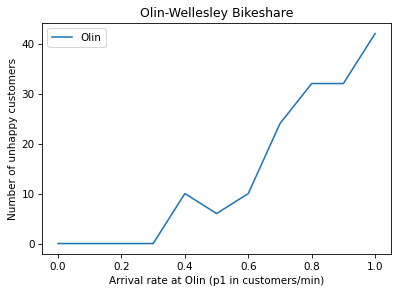

NameError: name 'plot' is not defined

In [49]:
import matplotlib.pyplot as plt

def plot_sweep(sweep):
    plt.plot(sweep, label='Olin')
    plt.xlabel('Arrival rate at Olin (p1 in customers/min)')
    plt.ylabel('Number of unhappy customers')
    plt.title('Olin-Wellesley Bikeshare')
    plt.legend()
    plt.show()

plot_sweep(sweep)
plot(sweep, label='Olin')

decorate(title='Olin-Wellesley Bikeshare',
         xlabel='Arrival rate at Olin (p1 in customers/min)', 
         ylabel='Number of unhappy customers')

## Exercises

**Exercise:** Wrap this code in a function named `sweep_p1` that takes an array called `p1_array` as a parameter.  It should create a new `SweepSeries`, run a simulation for each value of `p1` in `p1_array`, store the results in the `SweepSeries`, and return the `SweepSeries`.

Use your function to plot the number of unhappy customers at Olin as a function of `p1`.  Label the axes.

In [50]:
def sweep_p1(p1_array):
    unhappy_customers = pd.Series(index=p1_array)

    for p1 in p1_array:
        state = make_state(p1, p2, num_steps)
        unhappy_customers[p1] = state.olin_empty

    return unhappy_customers


/var/folders/rq/pjwvcx756yj1d22sqkt0rm3r0000gn/T/ipykernel_42949/542727311.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  unhappy_customers = pd.Series(index=p1_array)


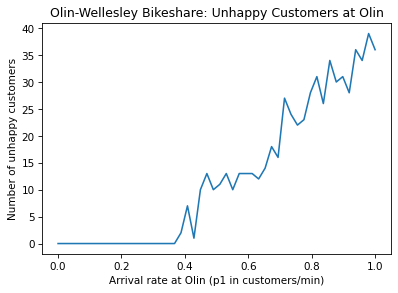

In [51]:
p1_array = np.linspace(0, 1, 50)

unhappy_customers = sweep_p1(p1_array)

plt.plot(p1_array, unhappy_customers)
plt.xlabel('Arrival rate at Olin (p1 in customers/min)')
plt.ylabel('Number of unhappy customers')
plt.title('Olin-Wellesley Bikeshare: Unhappy Customers at Olin')
plt.show()


**Exercise:** Write a function called `sweep_p2` that runs simulations with `p1=0.5` and a range of values for `p2`.  It should store the results in a `SweepSeries` and return the `SweepSeries`.


In [52]:
def sweep_p2(p2_array):
    p1 = 0.5 
    unhappy_customers = pd.Series(index=p2_array)

    for p2 in p2_array:
        state = make_state(p1, p2, num_steps)
        unhappy_customers[p2] = state.olin_empty

    return unhappy_customers


/var/folders/rq/pjwvcx756yj1d22sqkt0rm3r0000gn/T/ipykernel_42949/4206254792.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  unhappy_customers = pd.Series(index=p2_array)


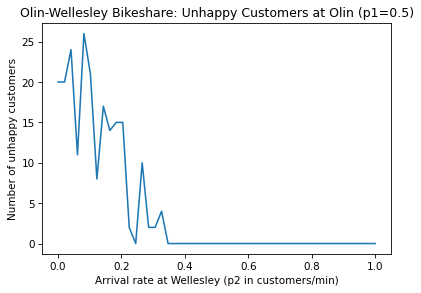

In [53]:
p2_array = np.linspace(0, 1, 50)  # Example

unhappy_customers = sweep_p2(p2_array)

plt.plot(p2_array, unhappy_customers)
plt.xlabel('Arrival rate at Wellesley (p2 in customers/min)')
plt.ylabel('Number of unhappy customers')
plt.title('Olin-Wellesley Bikeshare: Unhappy Customers at Olin (p1=0.5)')
plt.show()


## Optional Exercises

The following two exercises are a little more challenging.  If you are comfortable with what you have learned so far, you should give them a try.  If you feel like you have your hands full, you might want to skip them for now.

**Exercise:** Because our simulations are random, the results vary from one run to another, and the results of a parameter sweep tend to be noisy.  We can get a clearer picture of the relationship between a parameter and a metric by running multiple simulations with the same parameter and taking the average of the results.

Write a function called `run_multiple_simulations` that takes as parameters `p1`, `p2`, `num_steps`, and `num_runs`.

`num_runs` specifies how many times it should call `run_simulation`.

After each run, it should store the total number of unhappy customers (at Olin or Wellesley) in a `TimeSeries`.  At the end, it should return the `TimeSeries`.

Test your function with parameters

```
p1 = 0.3
p2 = 0.3
num_steps = 60
num_runs = 10
```

Display the resulting `TimeSeries` and use the `mean` function provided by the `TimeSeries` object to compute the average number of unhappy customers (see Section 2.7).

In [57]:
import numpy as np
import pandas as pd

def run_multiple_simulations(p1, p2, num_steps, num_runs):
    unhappy_customers = pd.Series()

    for run in range(num_runs):
        state = make_state(p1, p2, num_steps)
        run_simulation(state, p1, p2)
        unhappy_customers[run] = state.olin_empty + state.wellesley_empty

    return unhappy_customers


In [58]:
p1 = 0.3
p2 = 0.3
num_steps = 60
num_runs = 10

results = run_multiple_simulations(p1, p2, num_steps, num_runs)

print(results)
print("Average number of unhappy customers:", results.mean())


/var/folders/rq/pjwvcx756yj1d22sqkt0rm3r0000gn/T/ipykernel_42949/188883953.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  unhappy_customers = pd.Series()


TypeError: 'float' object cannot be interpreted as an integer

**Exercise:**  Continuting the previous exercise, use `run_multiple_simulations` to run simulations with a range of values for `p1` and

```
p2 = 0.3
num_steps = 60
num_runs = 20
```

Store the results in a `SweepSeries`, then plot the average number of unhappy customers as a function of `p1`.  Label the axes.

What value of `p1` minimizes the average number of unhappy customers?

In [31]:
# Solution goes here

In [32]:
# Solution goes here